C:\Users\david\Anaconda_23\python.exe
last day 2020-04-30 23:57:20
first day 2020-04-01 00:00:30
last day 2020-04-30
first day 2020-04-01
avg_duration Index(['date', 'avg_duration'], dtype='object')
avg_temp Index(['date', 'temperature_2m_mean (°C)'], dtype='object')
y values [18.93358773 20.78446839 25.2661652  21.10328371 25.10550931 20.4244839
 28.274195   22.46183114 17.9264044  21.68913603 29.33420678 27.84260676
 18.28850733 17.19865089 17.84365303 18.06985456 18.01957635 29.16016308
 29.0567411  24.87382479 20.76978532 19.02848302 18.45398773 20.4475084
 17.93615091 30.81077022 21.13761244 25.32771055 20.54474638 20.71539912]
Intercept: 
 17.997145393700222
Coefficients: 
 [0.60435544]
R-squared:  0.32234680166135343


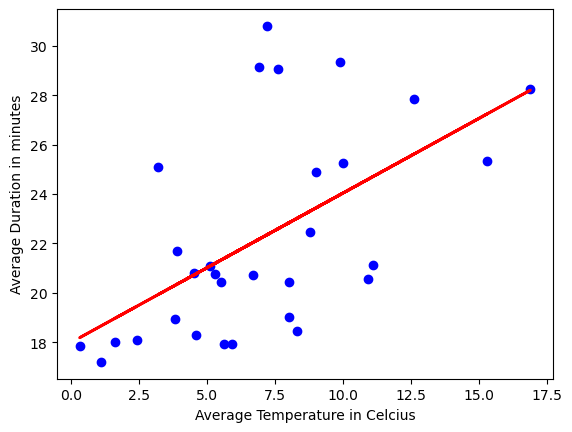

actual values of mean temp in C [25.32771055 18.06985456 20.4475084  29.16016308 17.9264044  21.68913603]
predicted values of mean temp in C [27.12272398 18.645309   20.68251725 21.60254678 20.74823364 19.63105492]


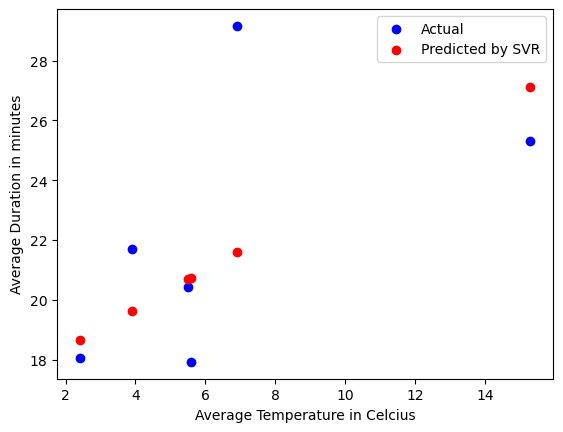

In [10]:
# Author David Miszczyk, CS 418 Fall 2023
import pandas as pd
import sys
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

print(sys.executable)

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv("DivvyBikes_for_418-2.csv",sep=',', low_memory=False)

#print("Divvy",df)

print("last day", df['started_at'].max())

print("first day", df['started_at'].min())

# bd = pd.read_csv('bike_data.zip', compression='zip') # 10-2023 Divvy data

# print(bd)

avg_temp = pd.read_csv("weather_data.csv", skiprows=2)

avg_temp.rename(columns={'time': 'date'}, inplace=True) # rename 'time' to 'date' column

print("last day", avg_temp['date'].max())

print("first day", avg_temp['date'].min())

df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])


# Calculate ride duration in minutes.
df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60

# clean duration column to remove anything longer than 24 hours.(1440 minutes)
df = df[df['duration'] <= 1440]

# Extract date from 'started_at'
df['date'] = df['started_at'].dt.date

# Calculate average duration for each day
avg_duration = df.groupby('date')['duration'].mean()

# Convert the 'avg_duration' Series into a DataFrame
avg_duration = avg_duration.reset_index()

avg_duration.columns = ['date', 'avg_duration']

print("avg_duration", avg_duration.columns)

print("avg_temp", avg_temp.columns)

# Convert the 'date' columns to datetime
avg_temp['date'] = pd.to_datetime(avg_temp['date'])

avg_duration['date'] = pd.to_datetime(avg_duration['date'])

# Merge the dataframes on 'date'
merged_df = pd.merge(avg_temp, avg_duration, on='date')

# Now you can perform linear regression on the merged dataframe
X = merged_df['temperature_2m_mean (°C)'].values.reshape(-1,1) # reshaping for sklearn compatibility

y = merged_df['avg_duration'].values

print("y values", y)

# Create a LinearRegression object
lm = LinearRegression()

lm.fit(X,y)

# Now, you can see the parameters of your fitted model
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

r_squared = lm.score(X, y)

print('R-squared: ', r_squared) # check R^2 value

# Plot the equation of the line and data points given by the Linear Regression.
plt.scatter(merged_df['temperature_2m_mean (°C)'], merged_df['avg_duration'], color='blue')
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Average Duration in minutes')

# Plotting the regression line
predicted_values = lm.predict(X)
plt.plot(merged_df['temperature_2m_mean (°C)'], predicted_values, color='red', linewidth=2)

plt.show()

# Assuming X is your feature set and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVR object
svr = SVR(kernel='linear')

# Train the model using the training sets
svr.fit(X_train, y_train)

# Now, you can use the trained model to predict the test data
y_pred = svr.predict(X_test)

print("actual values of mean temp in C", y_test)
print("predicted values of mean temp in C", y_pred)

# Scatter plot of the actual vs predicted values for the SVM.
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted by SVR')
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Average Duration in minutes')
plt.legend()
plt.show()

This section attempts to describe what happens in the code block above displaying the Linear Regression and Support Vector Regression plots.
The code above takes 2 files, i.e. 1. Divvy Ride share data and 2. mean daily temperature data in Celcius, for the time period between 2020-04-01 to 2020-04-30. Then, the code does two different Machine Learning techniques and displays a graph of each of the following. 1. Linear Regression 2. Support Vector Regression which is a type of Support Vector Machine. Each of the 2 dataframes for the 2 files was cleaned. The 1 file required converting some columns to datetime for consistency with the 2 file which had the same operation applied to the column containing the date information. The 1 file had to be grouped by the day as well since there were potentially many bike riders for any particular day in the CSV file and the average duration was computed all in 1 line of code with comment # Calculate average duration for each day. The X variable used to do the linear regression is the independent variable containing the mean temperature data and the dependent variable y contains the mean duration of Divvy rides for those same days on the calendar. Then, the R^2 value, used in statistics as the coefficient of determinanation, is computed after the linear regression for further analysis. The R^2 measured the goodness of fit of the model, i.e. linear legression. The code also performs a train_test_split from the sklearn.model_selection module to split the dataset into training and testing sets. The X is the feature set and y is the target variable. Setting the test_size=0.2 means that 20% of the data will be used for the test set and the remaining 80% will be used for the training set. The ouput from the test-train split is stored in variables X_train, X_test, y_train, y_test. An SVR object is called using the same 2 variables, i.e. X and y, to make a Support Vector Model with a linear kernal. A linear kernel is a dot product between two input vectors. The dot product, if I remember from Physics class correctly, tells us how parallel two vectors are. This means the model will try to fit a hyperplane that separates the data in the high-demensional space.

This section describes the inferences and correlations discovered from the 1. Linear Regression.
The linear regression tells us there is not a very strong correlation when testing independent variable X with mean temperature and dependent variable y with the Divvy ride duration data. In other words, the mean daily temperature was found to not be a very good predictor of Divvy bike ride duration because the data appears sort of scattered and distant from the regression line in many cases. The data ist mostly scattered away from the regression line and there is a big delta for duration between data clusters with similar temperatures. In addition to this finding, the R^2 was only 0.32 which implies the model is probably not the best fit. This answers the question posed by Team Monty Python's Hypothesis H1. During days with unfavorable temperatures, there is a significant reduction in the average duration of Divvy rides taken by customers. In other words, it's probably difficult to say that hypothesis is accurate given the results from the linear regression model.


This section describes the inferences and correlations discovered from the 2. Support Vector Regression.
The SVR also tells us there is not a very strong correlation between mean Divvy ride duration and mean daily temperature when testing with the independent variable X containing mean temperature data and the dependent variable y containing the Divvy ride duration data. Note, the predicted data points appear to follow somewhat of a linear pattern. If we oversimplify this observation, we can say that the temperature is not a good predictor of ride duration. On 2 occasions in the model, i.e. the clusters located 1 and 3 from left to right, the predicted and actual values are very close. For the remaining clusters, there is a large distance between the predicted versus the actual values for Divvy ride duration. In particular, when the actual temperate was around 7C in the 5 cluster, then the predicted data underestimated by about 7 mins. That makes the predicted value around 30% different from the actual value for mean Divvy ride duration which is quite large. Similarly, the 1 cluster has a 38% difference between predicted vs actual Divvy ride duration where it predicted the rides would be longer than the actual values. Therefore, given Team Monty Python's Hypothesis H1. During days with unfavorable temperatures, there is a significant reduction in the average duration of Divvy rides taken by customers, it is difficult to say that the hypothesis is accurate. In other words, the mean daily temperature is probably not a good predictor of Divvy ride duration.

actual values of mean temp in C [25.32771055 18.06985456 20.4475084  29.16016308 17.9264044  21.68913603]
predicted values of mean temp in C [28.274195   25.10550931 20.76978532 20.71539912 20.76978532 18.93358773]


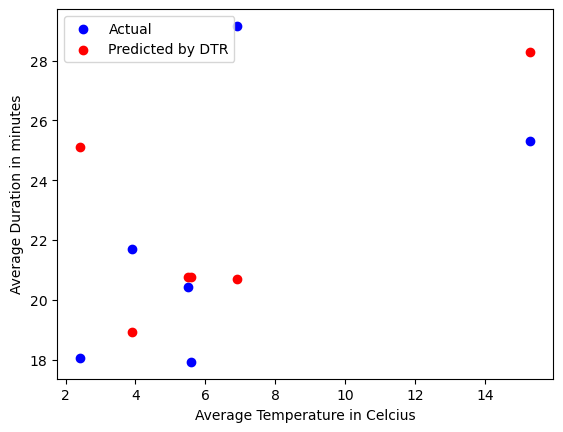

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dtree.fit(X_train, y_train)

# Now, you can use the trained model to predict the test data
y_pred = dtree.predict(X_test)

print("actual values of mean temp in C", y_test)
print("predicted values of mean temp in C", y_pred)

# Scatter plot of the actual vs predicted values for the Decision Tree.
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted by DTR')
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Average Duration in minutes')
plt.legend()
plt.show()

The plot above shows a Decision Tree prediction model applied to the same training data containing the independent variable X with mean temperature data and dependent variable y containing the Divvy ride duration data. 
The line of code with "dtree = DecisionTreeRegressor(random_state=42)" seeds a random number generator to a fixed state to ensure reproducible behavior.

The Decision Tree Regression, unlike the linear regression or SVR, did not output a somewhat linear pattern of predicted datapoints. This could be because of the random number generator which actually seems to at least give a different appearance than the previous 2 tested models. However, the DTR seems to show an even greater difference between predicted vs actual duration for most of the clusters than the SVR. E.g. cluster 1 predicted 25 mins while the actual is 18 mins. Cluster 5 predicted 21 min duration and the actual duration was 29 mins. The SVR predicted close to 18 mins for cluster 1 and the linear regression predicted duration around 18min for 2C. The most accurate predicted cluster in this model occurred at cluster 3 from left to right where 21 mins seems close enough to the actual which is slightly lower in duration. Another observation is that the model does not appear to overpredict or underpredict with a certainty but rather it does both. The DTR model confirms what the other 2 previously applied models showed that mean daily temperature is a weak predictor of Divvy ride duratio due inspection from these findings.

Actual values of mean temp in C: [25.32771055 18.06985456 20.4475084  29.16016308 17.9264044  21.68913603]
Predicted values of mean temp in C by KNN: [24.61306515 20.00835853 19.77643913 23.50950887 19.77643913 20.84307129]


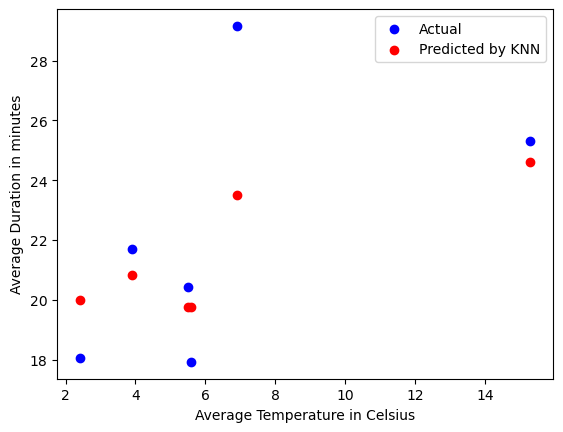

In [8]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Create a KNeighborsRegressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred_knn = knn.predict(X_test)

# Outputting the actual and predicted values
print("Actual values of mean temp in C:", y_test)
print("Predicted values of mean temp in C by KNN:", y_pred_knn)

# Scatter plot of the actual vs predicted values for the KNN.
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_knn, color='red', label='Predicted by KNN')
plt.xlabel('Average Temperature in Celsius')
plt.ylabel('Average Duration in minutes')
plt.legend()
plt.show()


This section explains what the code in the cell above the plot taht generates the KNN model does.
The code uses a K-Nearest-Neighbors Regression model with neighbors set to 5. That means the KNN calculates the average of the outcomes of the 5 nearest neighbors. This average becomes the predicted cluster.

This section explains the inferences and findings about the plot and model. 
To Do